In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
root_dir = r"C:\Users\DELL\Desktop\ml summer school\New folder\6_deep_learning\CNN\cats_and_dogs_filtered\cats_and_dogs_filtered"

In [15]:
BATCH_SIZE  = 32
EPOCHS = 10
input_img_size = (128,128)
input_shape = (128,128,3)

In [16]:
# Data Augmentation
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,#0.1
    width_shift_range=0.1,#0.1
    height_shift_range=0.1,#0.1
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


train_ds = tf_generator.flow_from_directory(
    root_dir+"/train",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_ds = tf_generator.flow_from_directory(
    root_dir+"/test",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode= 'categorical'
)

Found 2752 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


In [17]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    Dense(1,activation='softmax')
    
])

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model.add(layers.Dense(2, activation='softmax'))
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    13,779,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,868,549 (52.90 MB)

 Trainable params: 13,868,549 (52.90 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(train_ds,epochs=EPOCHS, validation_data=val_ds,verbose=1)

c:\Users\DELL\.virtualenvs\tf_best_practices-naA_UMEy\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


c:\Users\DELL\.virtualenvs\tf_best_practices-naA_UMEy\Lib\site-packages\keras\src\ops\nn.py:938: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


86/86 ━━━━━━━━━━━━━━━━━━━━ 63s 709ms/step - accuracy: 0.5036 - loss: 0.7096 - val_accuracy: 0.4597 - val_loss: 0.7186
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 56s 653ms/step - accuracy: 0.5036 - loss: 0.7010 - val_accuracy: 0.4597 - val_loss: 0.7076
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 55s 639ms/step - accuracy: 0.5036 - loss: 0.6969 - val_accuracy: 0.4597 - val_loss: 0.7021
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 66s 765ms/step - accuracy: 0.5036 - loss: 0.6949 - val_accuracy: 0.4597 - val_loss: 0.6991
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 63s 733ms/step - accuracy: 0.5036 - loss: 0.6939 - val_accuracy: 0.4597 - val_loss: 0.6968
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 69s 799ms/step - accuracy: 0.5036 - loss: 0.6936 - val_accuracy: 0.4597 - val_loss: 0.6957
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 61s 703ms/step - accuracy: 0.5036 - loss: 0.6933 - val_accuracy: 0.4597 - val_loss: 0.6950
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 63s 728ms/step - accuracy: 0.5036 - loss: 0.6932 - val_accuracy: 0.459

In [21]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.4597 - loss: 0.6939
Validation Loss: 0.6939
Validation Accuracy: 0.4597


In [22]:
BATCH_SIZE
input_shape

(128, 128, 3)

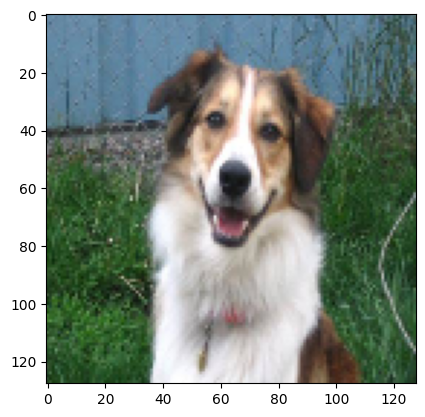

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"\Users\DELL\Desktop\ml summer school\New folder\6_deep_learning\CNN\cats_and_dogs_filtered\cats_and_dogs_filtered\test\dogs\dog.2373.jpg"

img = image.load_img(img_path, target_size=input_img_size)
img_array = image.img_to_array(img)  # shape: (_, _, 3)
img_array = img_array / 255.0        # normalize

img_array = np.expand_dims(img_array, axis=0)  # shape: (1, _, _, 3)
plt.imshow(img_array[0])  # Display the image

In [27]:
class_names = list(train_ds.class_indices.keys())

# Convert to dict
class_indices = {name: idx for idx, name in enumerate(class_names)}
print("Class names found:", class_indices)

Class names found: {'cats': 0, 'dogs': 1}


In [28]:
class_names

['cats', 'dogs']

In [29]:
model.predict(img_array)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


c:\Users\DELL\.virtualenvs\tf_best_practices-naA_UMEy\Lib\site-packages\keras\src\ops\nn.py:938: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


np.float32(0.4954114)

In [31]:
prediction = model.predict(img_array)[0][0]
class_name = "cats" if prediction > 0.5 else "dogs"

print(f"Predicted class: {class_name} with confidence {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted class: dogs with confidence 0.50


### Model Saving

In [32]:
import os
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: ML0029_MyatThinzarHlaing


In [33]:
model.save(f'./binary_classification/{ML_Summer_School_ID}_model.h5')

In [35]:
import json
# Save class names to a text file
with open(f'./binary_classification/{ML_Summer_School_ID}_class_indices.json', 'w') as f:
    class_names = list(train_ds.class_indices.keys())

    # Convert to dict
    class_indices = {name: idx for idx, name in enumerate(class_names)}
    json.dump(class_indices, f)
